<a href="https://colab.research.google.com/github/ArchXOX/Statistics-project/blob/main/Statistics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and cleaning


In [ ]:
#Importing data
%cd /content/drive/MyDrive/Statistics with Python - From Descriptive Statistics/Statistics with Python (2)/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!

/content/drive/MyDrive/Statistics with Python - From Descriptive Statistics/Statistics with Python (2)/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!


In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Getting data
data=pd.read_csv("imdb.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
#Picking important variables only
df=data[["Series_Title", "IMDB_Rating", "Released_Year", "Meta_score", "Runtime", "Gross", "Director"]]
df.head()

,Series_Title,IMDB_Rating,Released_Year,Meta_score,Runtime,Gross,Director
0,The Shawshank Redemption,9.3,1994,80.0,142 min,"28,341,469",Frank Darabont
1,The Godfather,9.2,1972,100.0,175 min,"134,966,411",Francis Ford Coppola
2,The Dark Knight,9.0,2008,84.0,152 min,"534,858,444",Christopher Nolan
3,The Godfather: Part II,9.0,1974,90.0,202 min,"57,300,000",Francis Ford Coppola
4,12 Angry Men,9.0,1957,96.0,96 min,"4,360,000",Sidney Lumet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   IMDB_Rating    1000 non-null   float64
 2   Released_Year  1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   Runtime        1000 non-null   object 
 5   Gross          831 non-null    object 
 6   Director       1000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
#Coverting Released Year from object to numeric value
#df['Released_Year'] = pd.to_numeric(df['Released_Year'])

In [ ]:
#Since there is an error at position 966, we first locate the error
df.iloc[966]

Series_Title       Apollo 13
IMDB_Rating              7.6
Released_Year             PG
Meta_score              77.0
Runtime              140 min
Gross            173,837,933
Director          Ron Howard
Name: 966, dtype: object

In [ ]:
#Error is 'PG', so we write the code again for Released Year with some changes
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

<ipython-input-49-37a2a6150ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


In [ ]:
#Checking for 'PG' error
df.iloc[966]

Series_Title       Apollo 13
IMDB_Rating              7.6
Released_Year            NaN
Meta_score              77.0
Runtime              140 min
Gross            173,837,933
Director          Ron Howard
Name: 966, dtype: object

In [ ]:
#Creating decade variable
df['Decade'] = np.floor(df['Released_Year']/10)*10
df['Decade']

<ipython-input-51-fc7ca39b8c00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = np.floor(df['Released_Year']/10)*10


0      1990.0
1      1970.0
2      2000.0
3      1970.0
4      1950.0
        ...  
995    1960.0
996    1950.0
997    1950.0
998    1940.0
999    1930.0
Name: Decade, Length: 1000, dtype: float64

In [ ]:
#Converting Runtime from object into int and removing 'min' keyword
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

<ipython-input-52-d68054fc68c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)


In [ ]:
#Some values in the Gross column are missing, so we convert these NaN values to 0
df['Gross'] = df['Gross'].fillna(0)
print(df['Gross'].isna().sum())

0


<ipython-input-53-1e2fd9f8ab7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].fillna(0)


In [ ]:
#Removing ',' in the Gross column so that we can convert it from an object to int
df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)

<ipython-input-54-cd12883cd3d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)


In [ ]:
#Creating a million(mil) variable for Gross
df['Gross_mil'] = df['Gross']/1000000

<ipython-input-55-aa54a76ac2cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_mil'] = df['Gross']/1000000


In [ ]:
#Removing Released_Year and Gross columns and finalizing df
df = df.drop(columns=['Released_Year', 'Gross'])
df.head()

,Series_Title,IMDB_Rating,Meta_score,Runtime,Director,Decade,Gross_mil
0,The Shawshank Redemption,9.3,80.0,142,Frank Darabont,1990.0,28.341469
1,The Godfather,9.2,100.0,175,Francis Ford Coppola,1970.0,134.966411
2,The Dark Knight,9.0,84.0,152,Christopher Nolan,2000.0,534.858444
3,The Godfather: Part II,9.0,90.0,202,Francis Ford Coppola,1970.0,57.300000
4,12 Angry Men,9.0,96.0,96,Sidney Lumet,1950.0,4.360000


# Exploratory Data Analysis

In [ ]:
df.describe()

,IMDB_Rating,Meta_score,Runtime,Decade,Gross_mil
count,1000.000000,843.000000,1000.000000,999.000000,1000.000000
mean,7.949300,77.971530,122.891000,1986.586587,56.536878
std,0.275491,12.376099,28.093671,23.189130,103.238179
min,7.600000,28.000000,45.000000,1920.000000,0.000000
25%,7.700000,70.000000,103.000000,1970.000000,0.445710
50%,7.900000,79.000000,119.000000,1990.000000,10.702751
75%,8.100000,87.000000,137.000000,2000.000000,61.539891
max,9.300000,100.000000,321.000000,2020.000000,936.662225


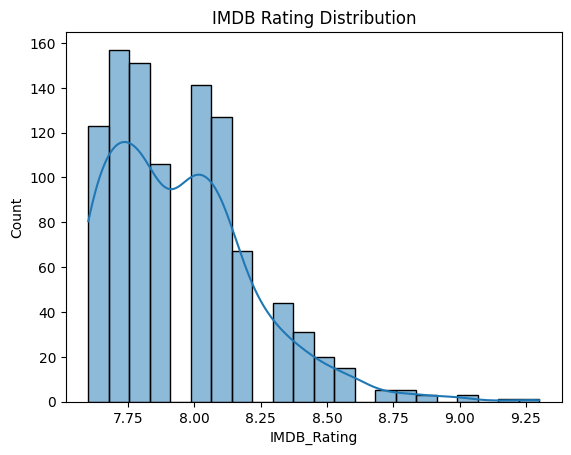

In [ ]:
#Histogram of IMDB ratings
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('IMDB Rating Distribution')
plt.show()

In [ ]:
#Study of the top 10 directors with the highest average ratings
director_ratings = (df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10))
print(director_ratings)

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
George Lucas          8.60
Roberto Benigni       8.60
Masaki Kobayashi      8.60
Thomas Kail           8.60
Sudha Kongara         8.60
Fernando Meirelles    8.60
Roger Allers          8.50
Name: IMDB_Rating, dtype: float64


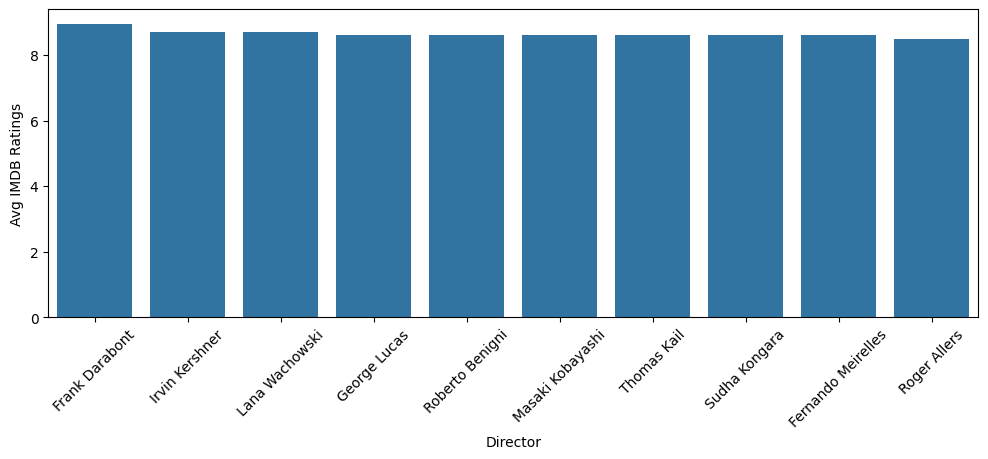

In [ ]:
#Visualizing using Barplot
plt.figure(figsize=(12,4))
sns.barplot(x=director_ratings.index, y=director_ratings.values)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Avg IMDB Ratings')
plt.show()

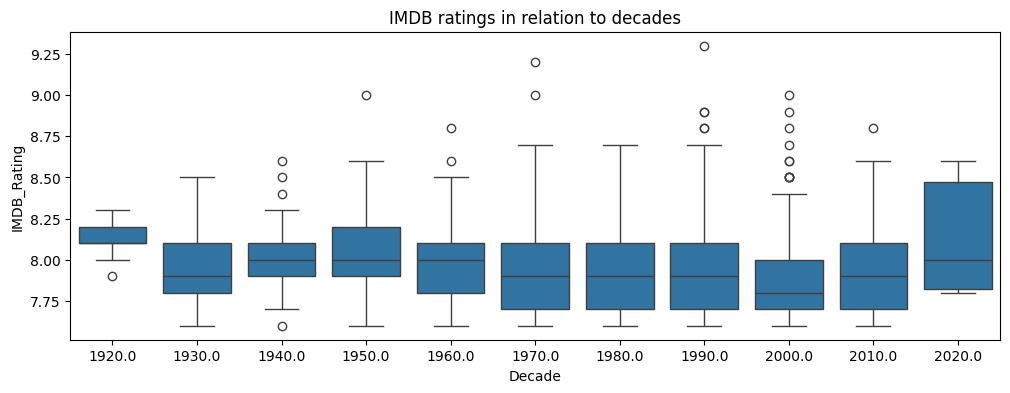

In [ ]:
#IMDB ratings in relation to decades - Focus more on the middle line - higher the line - higher the ratings, bigger the box - more is the spread i.e more variability
plt.figure(figsize=(12,4))
sns.boxplot(x='Decade', y='IMDB_Rating',data=df)
plt.title('IMDB ratings in relation to decades')
plt.show()


In [ ]:
#Covariance
df_co = df[['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross_mil']]
df_co.cov()

,IMDB_Rating,Meta_score,Runtime,Gross_mil
IMDB_Rating,0.075895,0.942946,1.881455,2.343023
Meta_score,0.942946,153.167835,-10.526302,-72.676259
Runtime,1.881455,-10.526302,789.254373,417.438934
Gross_mil,2.343023,-72.676259,417.438934,10658.121703


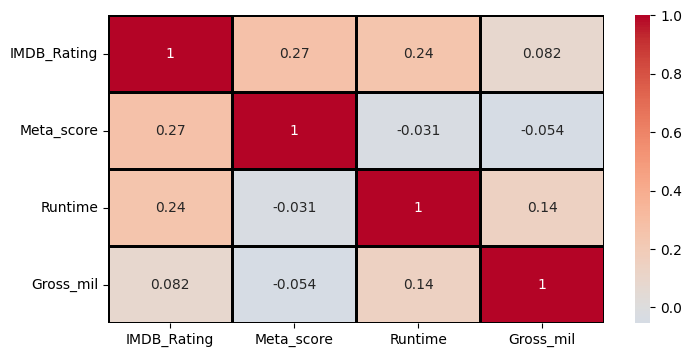

In [ ]:
#Correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df_co.corr(), annot=True, center=0, cmap='coolwarm', linewidth=1, linecolor='black')
plt.show()

# Estimating Average Ratings

In [ ]:
#Calculating mean, standard deviation and sample size for SE (agg-aggregate)
summary = df.groupby('Decade').agg({'Gross_mil' : ['mean', 'std', 'count']})

In [ ]:
#Renaming column names
summary.columns = ['Gross_mean', 'Gross_std', 'Gross_count']

In [ ]:
#Std error of sample mean

#With formula
summary['Gross_sem'] = summary['Gross_std']/(np.sqrt(summary['Gross_count']))
print(summary)

        Gross_mean   Gross_std  Gross_count  Gross_sem
Decade                                                
1920.0    1.341802    2.084388           11   0.628467
1930.0    9.968549   40.300467           24   8.226298
1940.0    4.739121   13.376285           35   2.261005
1950.0    7.846706   17.703398           56   2.365716
1960.0   21.234302   35.304236           73   4.132048
1970.0   41.051211   61.715373           76   7.079239
1980.0   56.013362   78.126921           89   8.281437
1990.0   57.147999   92.390192          150   7.543628
2000.0   63.191930  102.460660          237   6.655535
2010.0   92.148255  146.224140          242   9.399644
2020.0    0.000000    0.000000            6   0.000000


In [ ]:
#Calculating confidence interval for a large sample with 95% CL
alpha=0.05
summary['t_scores'] = st.t.ppf(1-alpha/2, summary['Gross_count']-1) #By doing 1-alpha/2 instead of (1-alpha)/2, we get 0.975 instead of 0.475

#Confidence interval
summary['lower_ci'] = summary['Gross_mean'] - summary['t_scores']*summary['Gross_sem']
summary['upper_ci'] = summary['Gross_mean'] + summary['t_scores']*summary['Gross_sem']

In [ ]:
#Displaying results
summary

,Gross_mean,Gross_std,Gross_count,Gross_sem,t_scores,lower_ci,upper_ci
Decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,2.228139,-0.058509,2.742113
1930.0,9.968549,40.300467,24,8.226298,2.068658,-7.048845,26.985944
1940.0,4.739121,13.376285,35,2.261005,2.032245,0.144207,9.334036
1950.0,7.846706,17.703398,56,2.365716,2.004045,3.105705,12.587706
1960.0,21.234302,35.304236,73,4.132048,1.993464,12.997214,29.471390
1970.0,41.051211,61.715373,76,7.079239,1.992102,26.948645,55.153778
1980.0,56.013362,78.126921,89,8.281437,1.987290,39.555746,72.470978
1990.0,57.147999,92.390192,150,7.543628,1.976013,42.241692,72.054307
2000.0,63.191930,102.460660,237,6.655535,1.970067,50.080081,76.303779


# Conclusions
1) The average runtime of  movie is 123 minutes and the minimum rating a movie can get is 7.6 even if its runtime is 123 minutes or more

2) Frank Darabont has made more number of high rated movies. It can be concluded that his movies successfully satisfy the general audience.

3) Many good movies were produced in 1920s, with the rating lying in the range 8-8.25

4) 2020s saw a wide range in ratings of movies, showing the different tastes in movies that modernisation has led to and also that the public is not easily impressed

5) Negative correlation between runtime and meta score shows that critics generally dont like movies that get dragged on for too long

6) The 2000s has many outliers which indicates that it had many exceptionally good, record-breaking movies

7) As the decades passed by, more movies were watched which shows the gradual interest in cinema and also that movies have become affordable and accessable in general.

8) In the decade 2020, a highly rated movie is expected to pass the 100 million mark.